In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv") 
data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [3]:
data.shape

(571, 43)

In [4]:
data.index

RangeIndex(start=0, stop=571, step=1)

In [5]:
data.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [6]:
data.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [7]:
for column in data.columns:
    unique_count = data[column].nunique()
    print("Column:", column, "Unique Value Count:", unique_count)

Column: Seat No. Unique Value Count: 571
Column: PH-121 Unique Value Count: 13
Column: HS-101 Unique Value Count: 12
Column: CY-105 Unique Value Count: 13
Column: HS-105/12 Unique Value Count: 13
Column: MT-111 Unique Value Count: 13
Column: CS-105 Unique Value Count: 11
Column: CS-106 Unique Value Count: 13
Column: EL-102 Unique Value Count: 13
Column: EE-119 Unique Value Count: 12
Column: ME-107 Unique Value Count: 13
Column: CS-107 Unique Value Count: 14
Column: HS-205/20 Unique Value Count: 13
Column: MT-222 Unique Value Count: 14
Column: EE-222 Unique Value Count: 13
Column: MT-224 Unique Value Count: 14
Column: CS-210 Unique Value Count: 14
Column: CS-211 Unique Value Count: 14
Column: CS-203 Unique Value Count: 13
Column: CS-214 Unique Value Count: 13
Column: EE-217 Unique Value Count: 13
Column: CS-212 Unique Value Count: 12
Column: CS-215 Unique Value Count: 14
Column: MT-331 Unique Value Count: 12
Column: EF-303 Unique Value Count: 12
Column: HS-304 Unique Value Count: 14
Col

###### Data type in all columns is categorical and almost all columns have null values.
###### CS-406 and CS-412 have too much nulls, So I will remove these columns.

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(571, 43)

###### No duplicates valus present.

In [10]:
data = data.drop(columns=['CS-406','CS-412'])
data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-414,CS-419,CS-423,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C,C-,C-,C-,C-,A,C-,B,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,A-,D,D+,D,C,D,B-,C,C,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,A-,A-,B,B,A,C,A,A,A-,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,B+,C-,D+,C,D+,C-,B,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,A-,B-,B+,B+,B-,A,A-,A-,3.448


In [11]:
x = data.drop('CGPA',axis = 1)
y = data['CGPA']


In [12]:
from sklearn.impute import SimpleImputer
sim = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(sim.fit_transform(x), columns=x.columns)

In [13]:
data_imputed.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-414       0
CS-419       0
CS-423       0
dtype: int64

##### so all nulls are fill

In [14]:
data_imputed = data_imputed.drop(columns=['Seat No.'])
data_imputed.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-414,CS-419,CS-423
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C,C-,C,C-,C-,C-,C-,A,C-,B
1,A,D,D+,D,B-,C,D,A,D+,D,...,C,A-,D,D+,D,C,D,B-,C,C
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B+,A-,A-,B,B,A,C,A,A,A-
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,B+,C-,D+,C,D+,C-,B,C+,C+
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A-,B-,A-,B-,B+,B+,B-,A,A-,A-


In [15]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

for column in data_imputed:
    data_imputed[column] = encoder.fit_transform(data_imputed[[column]])
    
print(data_imputed.head)


<bound method NDFrame.head of      PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0       5.0    10.0     8.0        6.0     8.0    10.0     9.0     8.0   
1       0.0     9.0    10.0        9.0     5.0     6.0     9.0     0.0   
2       0.0     3.0     0.0        5.0     4.0     0.0     5.0     4.0   
3       9.0     7.0    10.0        9.0     9.0     2.0    10.0     8.0   
4       2.0     2.0     2.0        4.0     0.0     0.0     2.0     4.0   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566     3.0     0.0     0.0        2.0     1.0     0.0     2.0     2.0   
567     1.0     0.0     0.0        0.0     0.0     0.0     0.0     2.0   
568     3.0     0.0     2.0        4.0     0.0     0.0     0.0     0.0   
569     0.0     4.0     9.0        0.0     9.0    10.0     5.0     8.0   
570     6.0     9.0     9.0        6.0     6.0    10.0     3.0     7.0   

     EE-119  ME-107  ...  EL-332  CS-318  CS-306  CS-312  CS-317  CS-403  \
0    

##### all data is encoded

In [16]:
data2 = pd.concat([data_imputed,y],axis = 1)
data2

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-414,CS-419,CS-423,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,6.0,8.0,8.0,8.0,8.0,0.0,8.0,3.0,2.205
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,2.0,9.0,10.0,9.0,6.0,9.0,5.0,6.0,6.0,2.008
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,2.0,2.0,3.0,3.0,0.0,6.0,0.0,0.0,2.0,3.608
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,4.0,8.0,10.0,6.0,10.0,8.0,3.0,7.0,7.0,1.906
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,2.0,5.0,4.0,4.0,5.0,0.0,2.0,2.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,0.0,4.0,2.0,2.0,0.0,0.0,4.0,4.0,3.0,3.798
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1.0,2.0,4.0,4.0,0.0,0.0,3.0,2.0,6.0,3.772
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,7.0,4.0,2.0,3.0,0.0,4.0,6.0,4.0,2.0,3.470
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,5.0,4.0,9.0,3.0,3.0,8.0,6.0,3.0,5.0,2.193


In [17]:
pd.DataFrame(data2)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-414,CS-419,CS-423,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,6.0,8.0,8.0,8.0,8.0,0.0,8.0,3.0,2.205
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,2.0,9.0,10.0,9.0,6.0,9.0,5.0,6.0,6.0,2.008
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,2.0,2.0,3.0,3.0,0.0,6.0,0.0,0.0,2.0,3.608
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,4.0,8.0,10.0,6.0,10.0,8.0,3.0,7.0,7.0,1.906
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,2.0,5.0,4.0,4.0,5.0,0.0,2.0,2.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,0.0,4.0,2.0,2.0,0.0,0.0,4.0,4.0,3.0,3.798
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1.0,2.0,4.0,4.0,0.0,0.0,3.0,2.0,6.0,3.772
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,7.0,4.0,2.0,3.0,0.0,4.0,6.0,4.0,2.0,3.470
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,5.0,4.0,9.0,3.0,3.0,8.0,6.0,3.0,5.0,2.193


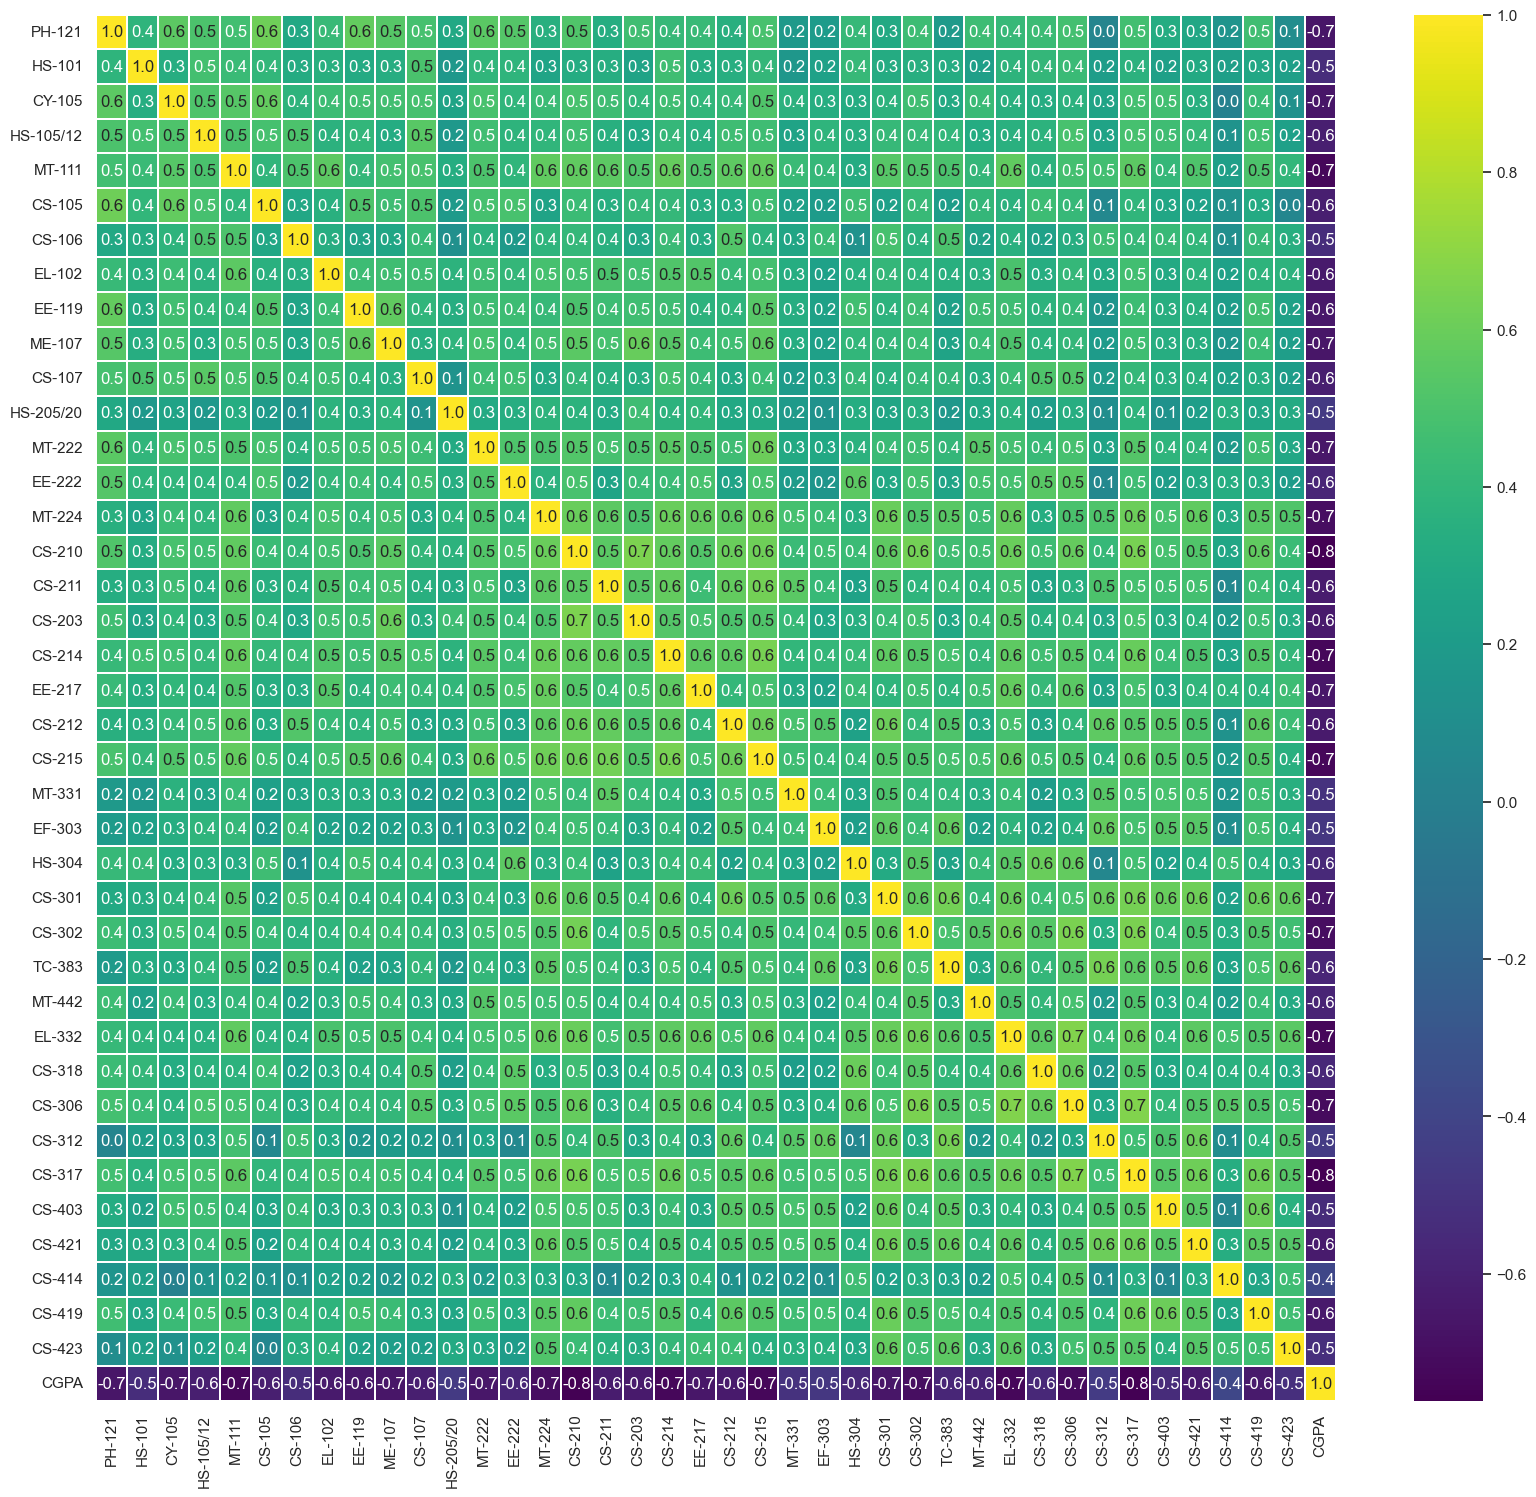

In [18]:
plt.figure(figsize=(20, 18))  
sns.set(font_scale=1)     
cmap = 'viridis'             
fmt = ".1f"                 

sns.heatmap(data2.corr(), linewidths=0.2, cmap=cmap, fmt=fmt, annot=True)
plt.show()


###### All features have a very good correlation with label, but there is also a lot of multicollinearity within features.

In [19]:
## Dividing dependent and independent variable
x = data2.drop('CGPA',axis = 1)
y = data2['CGPA']


In [20]:
## After dividing variable I scaled independent variable to normalizes the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler() 
x_scaled = scalar.fit_transform(x)


### variance_inflation_factor

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
## detect the
vif = pd.DataFrame()   

vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]  

vif["Features"] = x.columns    

vif

,vif,Features
0,2.782815,PH-121
1,1.764737,HS-101
2,2.465749,CY-105
3,2.253385,HS-105/12
4,2.624243,MT-111
5,2.364629,CS-105
6,1.919582,CS-106
7,1.954079,EL-102
8,2.165033,EE-119
9,2.284500,ME-107


##### after looking at vif no multicollinearity issue was found here

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

#### Model bulding

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.20, random_state = 30)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n============Train Result================")
        mse = mean_absolute_error(y_train, y_pred)
        r2 = r2_score(y_train, y_pred)
        print("Mean Squared Error : ",mse)
        print("R-squared (R2) Score : ",r2)

    elif not train:
        y_pred = clf.predict(x_test)
        print("\n============Test Result================")
        mse = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print("Mean Squared Error : ",mse)
        print("R-squared (R2) Score : ",r2)


In [26]:
#AdaBoostRegressor
ada = AdaBoostRegressor()
#Model Training 
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [27]:
#Call the function and pass dataset to check train and test score 
metric_score(ada,x_train,x_test,y_train,y_test,train=True)         # This is for training score

metric_score(ada,x_train,x_test,y_train, y_test,train=False)        # This is for testing score



============Train Result================
Mean Squared Error :  0.13925556540593273
R-squared (R2) Score :  0.9333272203369888

============Test Result================
Mean Squared Error :  0.15040873838360255
R-squared (R2) Score :  0.8914026931328013


In [28]:
# Initiate KNeighborsRegressor 
knn= KNeighborsRegressor()

#Model Training 
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [29]:
#Call the function and pass dataset to check train and test score 
metric_score(knn,x_train,x_test,y_train,y_test,train=True)         # This is for training score

metric_score(knn,x_train,x_test,y_train, y_test,train=False)        # This is for testing score



============Train Result================
Mean Squared Error :  0.08444912280701757
R-squared (R2) Score :  0.9298071700845516

============Test Result================
Mean Squared Error :  0.07719652173913039
R-squared (R2) Score :  0.963620374824884


In [30]:
# Initiate LinearRegression 
lin= LinearRegression()

#Model Training 
lin.fit(x_train, y_train)

LinearRegression()

In [31]:
#Call the function and pass dataset to check train and test score 
metric_score(lin,x_train,x_test,y_train,y_test,train=True)         # This is for training score

metric_score(lin,x_train,x_test,y_train, y_test,train=False)        # This is for testing score



============Train Result================
Mean Squared Error :  0.10290759549402768
R-squared (R2) Score :  0.922040228760399

============Test Result================
Mean Squared Error :  0.09190509352351511
R-squared (R2) Score :  0.9577009329660142


In [32]:
# Initiate DecisionTreeRegressor 
dtr= DecisionTreeRegressor()

#Model Training 
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [33]:
#Call the function and pass dataset to check train and test score 
metric_score(dtr,x_train,x_test,y_train,y_test,train=True)         # This is for training score

metric_score(dtr,x_train,x_test,y_train, y_test,train=False)        # This is for testing score



============Train Result================
Mean Squared Error :  0.0
R-squared (R2) Score :  1.0

============Test Result================
Mean Squared Error :  0.16459999999999997
R-squared (R2) Score :  0.8157823612513849


#### cross-validation¶

In [34]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [35]:
lasso_regressor = LassoCV(alphas=None,max_iter=10)
lasso_regressor.fit(x_train, y_train)

LassoCV(max_iter=10)

In [36]:
#best alpha parameter
alpha = lasso_regressor.alpha_
alpha

0.0013110310940012888

In [37]:
#now we have best parameter, let,s use lasso regresssion and see 
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0013110310940012888)

In [38]:
lasso_reg.score(x_test, y_test)

0.9601130245497477

##### Use AdaBoostRegressor

In [39]:
import pickle

In [40]:
pickle.dump(ada,open('Student grades','wb'))